In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import datetime
from datetime import timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pwd

/home/jovyan/B_jupyter_notebook_profittablity_clustering


In [3]:
orders_ds = pd.read_csv('/home/jovyan/A_Dataset_Graph/orders_biennio_15_16_20210403.csv')

In [4]:
orders_ds

,user_id,created_at,invoice_id,ricavo
0,104,2015-10-17 18:12:43,11233,14080.0
1,6127,2016-10-21 15:49:16,22344,18539.0
2,1709,2015-03-10 08:00:40,4790,1450.0
3,6942,2016-12-19 15:03:42,24416,500.0
4,468,2015-01-18 20:54:41,3936,3050.0
...,...,...,...,...
19862,380,2016-08-02 11:05:10,19812,3494.0
19863,1132,2015-01-26 12:00:27,4035,3425.0
19864,3011,2015-08-25 07:07:16,9180,2580.0
19865,1629,2015-03-12 08:44:39,4827,1600.0


In [5]:
orders_ds.dtypes

user_id         int64
created_at     object
invoice_id      int64
ricavo        float64
dtype: object

In [6]:
orders_ds.describe()

,user_id,invoice_id,ricavo
count,19867.000000,19867.000000,19865.000000
mean,2792.191020,14186.794181,3731.737629
std,1814.347676,6017.270177,4463.738486
min,3.000000,3716.000000,0.000000
25%,1513.000000,9006.500000,1835.000000
50%,2593.000000,14188.000000,3000.000000
75%,3855.000000,19370.500000,4430.000000
max,48090.000000,24655.000000,305000.000000


## DATA CLEANING

#### Searching for missing values

In [7]:
sum_nan = 0
for col in list (orders_ds.columns):
    if any (orders_ds[col].isnull()):
        sum_nan = sum_nan +1
print ('---Checking for NULL value ---')
print (f'There is {sum_nan} NULL values')

missingValueMask = orders_ds.loc[:,'user_id'].isna()
print('Rows with missing values')
print(orders_ds.loc[missingValueMask,:]) 
print()
print('orders_ds.loc[missingValueMask,:].shape')
print(orders_ds.loc[missingValueMask,:].shape)

missingValueMask = orders_ds.loc[:,'created_at'].isna()
print('Rows with missing values')
print(orders_ds.loc[missingValueMask,:]) 
print()
print('orders_ds.loc[missingValueMask,:].shape')
print(orders_ds.loc[missingValueMask,:].shape)

missingValueMask = orders_ds.loc[:,'invoice_id'].isna()
print('Rows with missing values')
print(orders_ds.loc[missingValueMask,:]) 
print()
print('orders_ds.loc[missingValueMask,:].shape')
print(orders_ds.loc[missingValueMask,:].shape)

missingValueMask = orders_ds.loc[:,'ricavo'].isna()
print('Rows with missing values')
print(orders_ds.loc[missingValueMask,:]) 
print()
print('orders_ds.loc[missingValueMask,:].shape')
print(orders_ds.loc[missingValueMask,:].shape)

---Checking for NULL value ---
There is 1 NULL values
Rows with missing values
Empty DataFrame
Columns: [user_id, created_at, invoice_id, ricavo]
Index: []

orders_ds.loc[missingValueMask,:].shape
(0, 4)
Rows with missing values
Empty DataFrame
Columns: [user_id, created_at, invoice_id, ricavo]
Index: []

orders_ds.loc[missingValueMask,:].shape
(0, 4)
Rows with missing values
Empty DataFrame
Columns: [user_id, created_at, invoice_id, ricavo]
Index: []

orders_ds.loc[missingValueMask,:].shape
(0, 4)
Rows with missing values
       user_id           created_at  invoice_id  ricavo
3507      2594  2016-04-23 13:55:54       16626     NaN
19565     5606  2016-07-18 20:45:44       19344     NaN

orders_ds.loc[missingValueMask,:].shape
(2, 4)


### For the 'ricavo' column I may drop the null but I rather prefere use the mean or median revenue value

In [8]:
ricavo_temp= orders_ds['ricavo'].dropna()
ricavo_medio = ricavo_temp.mean()
print('ricavo medio: ', ricavo_medio)
ricavo_mediano = ricavo_temp.median()
print('ricavo mediano: ', ricavo_mediano)

orders_ds['ricavo'].fillna(ricavo_medio, inplace=True)
orders_ds
orders_ds.loc[:,'ricavo'] = orders_ds.loc[:,'ricavo'].astype(int)
orders_ds.loc[:,'ricavo'] = orders_ds.loc[:,'ricavo'].apply(lambda x: x/100)

ricavo medio:  3731.737628995721
ricavo mediano:  3000.0


### Let's see the first 10 row

In [9]:
orders_ds.loc[orders_ds.index<10,:]

,user_id,created_at,invoice_id,ricavo
0,104,2015-10-17 18:12:43,11233,140.80
1,6127,2016-10-21 15:49:16,22344,185.39
2,1709,2015-03-10 08:00:40,4790,14.50
3,6942,2016-12-19 15:03:42,24416,5.00
4,468,2015-01-18 20:54:41,3936,30.50
5,983,2016-07-02 08:35:30,18803,32.00
6,708,2015-11-23 17:04:03,12502,26.60
7,1944,2015-04-12 09:36:01,5468,80.60
8,2858,2015-12-14 16:06:15,13093,49.50
9,4130,2016-01-07 16:39:39,13520,38.00


In [10]:
#Modify the created_at column data from object to timestamp 
orders_ds['created_at'] = pd.to_datetime(orders_ds['created_at'], infer_datetime_format=True)
#create a new column with year.mounth format as a string (object) 
orders_ds['year_month'] = orders_ds['created_at'].dt.strftime('%Y.%m')

#the line of code below is used to transform string object to datastamp with year.mounth format as datastamp, but we dnt need to do so. 
#orders_ds['year_mounth'] = pd.to_datetime(orders_ds['year_mounth'], infer_datetime_format=True)

#I create a list of string with all the year.month
year_month_list=()
year_month_list = orders_ds['year_month'].astype(str).str[:10].values.tolist() 

#I create a lista of the unique value of year.value
year_month_list_u= list()
for item in year_month_list:
    if item in year_month_list_u:
        continue
    else:
        year_month_list_u.append(item)

year_month_list_u.sort()
print(year_month_list_u)

['2015.01', '2015.02', '2015.03', '2015.04', '2015.05', '2015.06', '2015.07', '2015.08', '2015.09', '2015.10', '2015.11', '2015.12', '2016.01', '2016.02', '2016.03', '2016.04', '2016.05', '2016.06', '2016.07', '2016.08', '2016.09', '2016.10', '2016.11', '2016.12']


In [11]:
#CREATE DEFINITION OF FORMULA TO HANDLE THE OUTLIER
def cap_outliers(series, iqr_threshold, verbose=False):
    '''Caps outliers to closest existing value within threshold (IQR).'''
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1

    lbound = Q1 - iqr_threshold * IQR
    ubound = Q3 + iqr_threshold * IQR

    outliers = (series < lbound) | (series > ubound)

    series = series.copy()
    series.loc[series < lbound] = series.loc[~outliers].min()
    series.loc[series > ubound] = series.loc[~outliers].max()

    # For comparison purposes.
    if verbose:
            print('\n'.join(
                ['Capping outliers by the IQR method:',
                 f'   IQR threshold: {iqr_threshold}',
                 f'   Lower bound: {lbound}',
                 f'   Upper bound: {ubound}\n']))

    return series

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -370.0
   Upper bound: 395.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -49.0
   Upper bound: 52.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -915.75
   Upper bound: 990.375



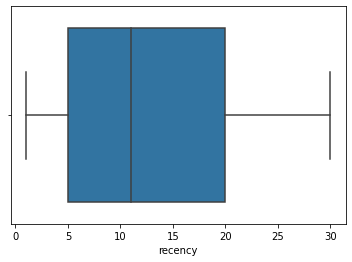

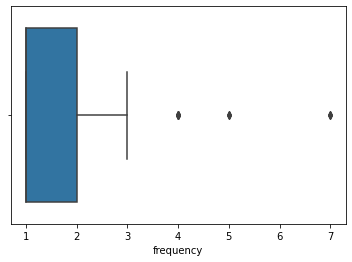

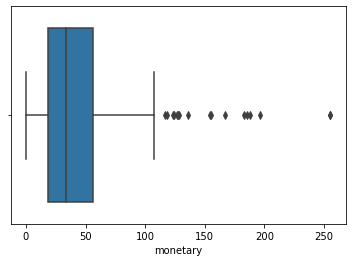

<Figure size 432x288 with 0 Axes>

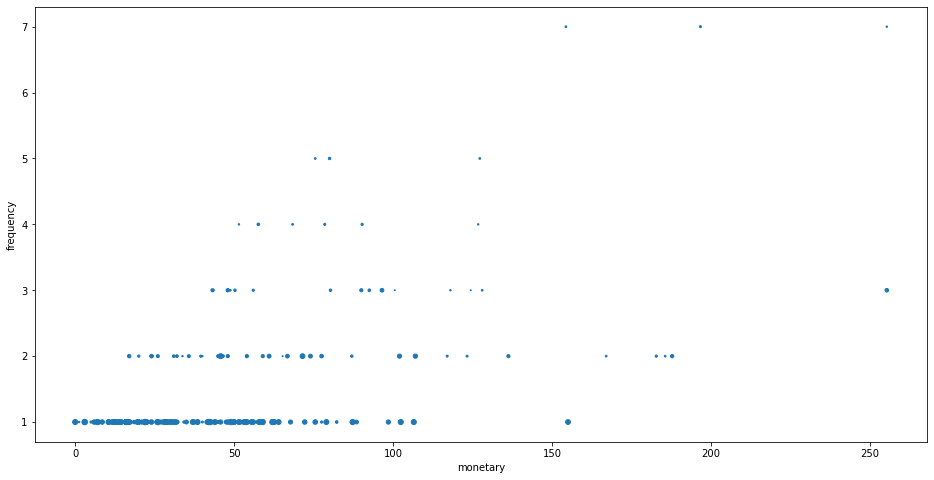

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -592.0
   Upper bound: 632.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -49.0
   Upper bound: 52.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -1601.75
   Upper bound: 1706.2375



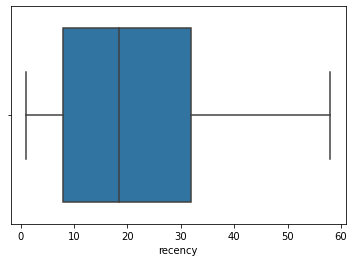

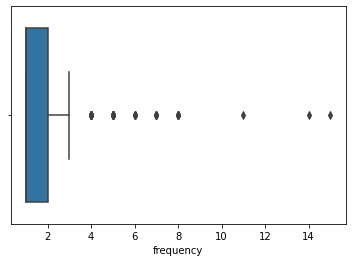

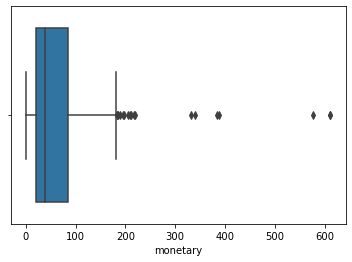

<Figure size 432x288 with 0 Axes>

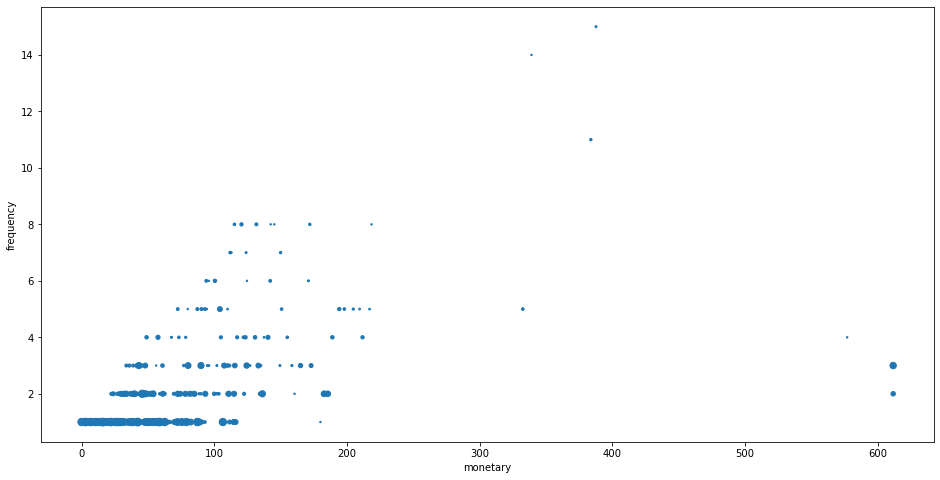

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -942.0
   Upper bound: 996.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -99.0
   Upper bound: 103.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2011.25
   Upper bound: 2130.715



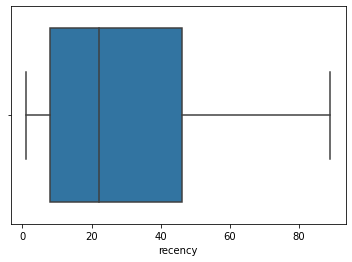

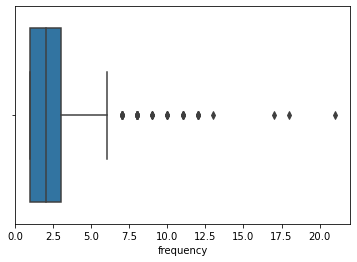

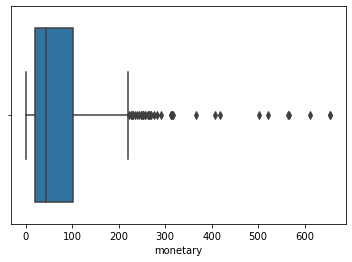

<Figure size 432x288 with 0 Axes>

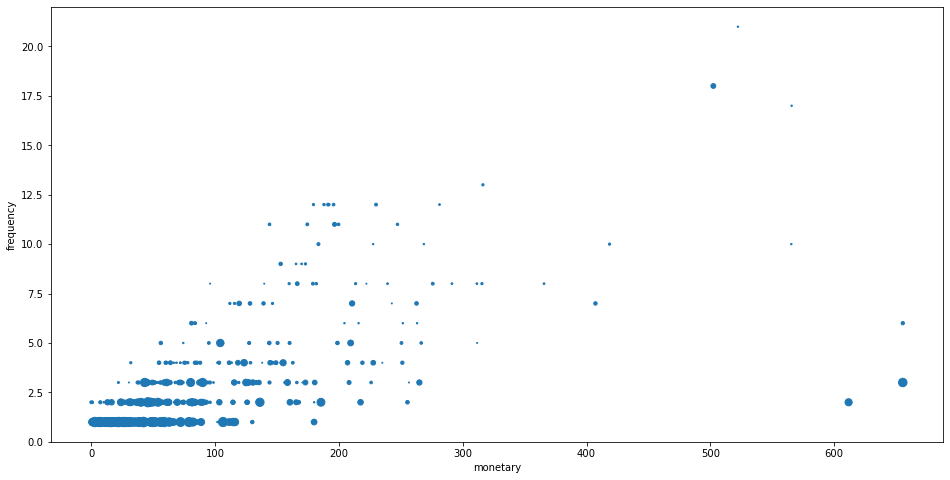

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -1248.25
   Upper bound: 1314.5

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2403.6250000000005
   Upper bound: 2539.5500000000006



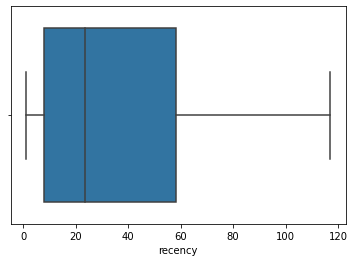

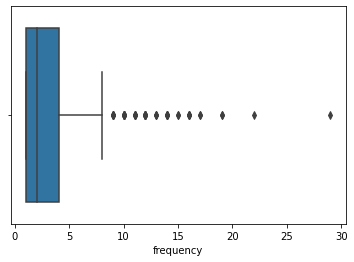

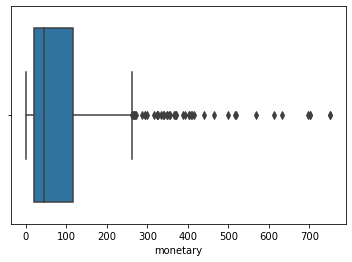

<Figure size 432x288 with 0 Axes>

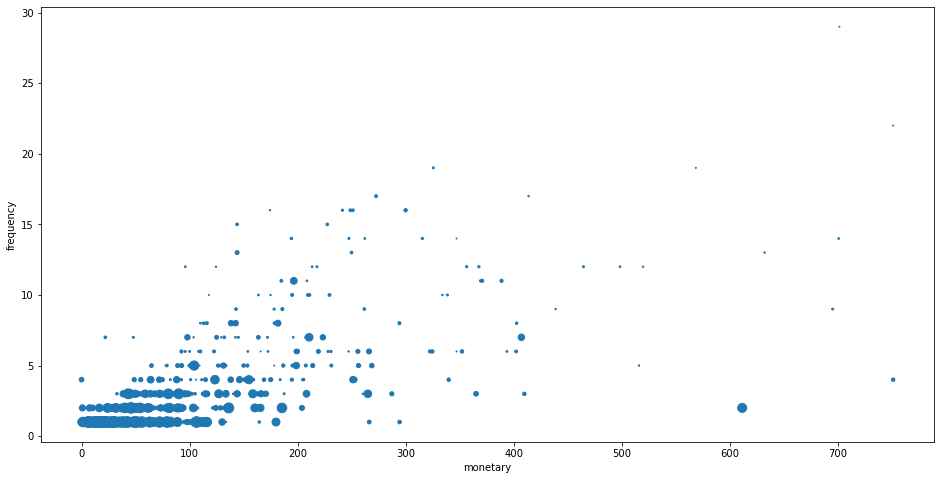

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -1433.75
   Upper bound: 1511.5

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2569.0625
   Upper bound: 2711.605



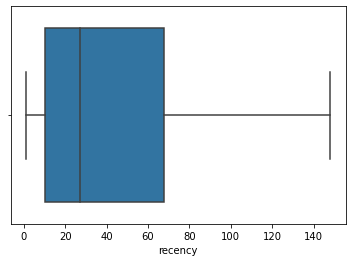

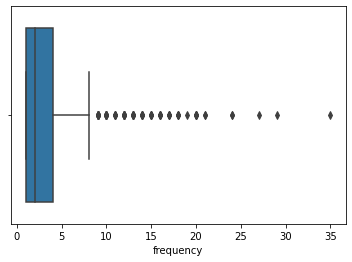

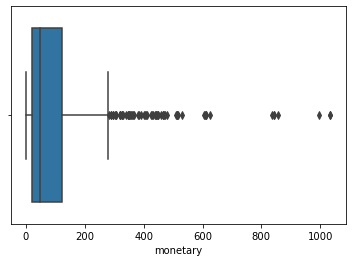

<Figure size 432x288 with 0 Axes>

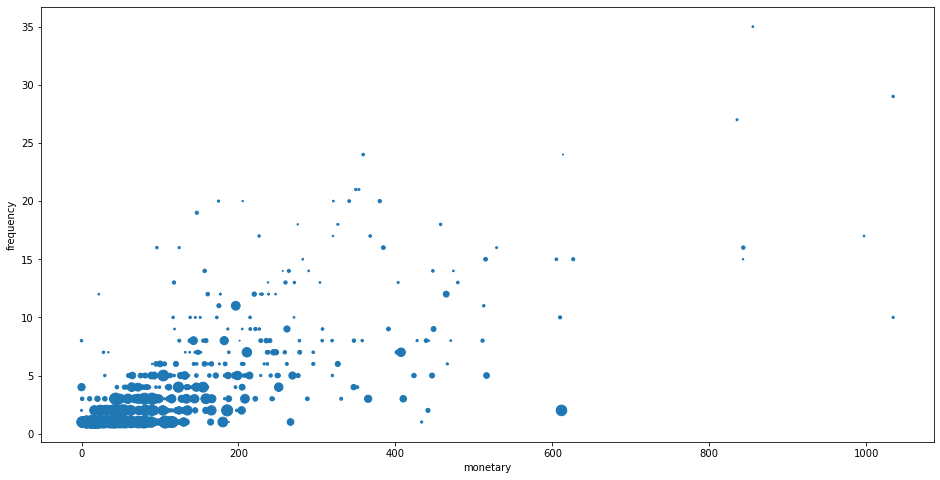

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -1538.0
   Upper bound: 1624.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2719.0
   Upper bound: 2870.6



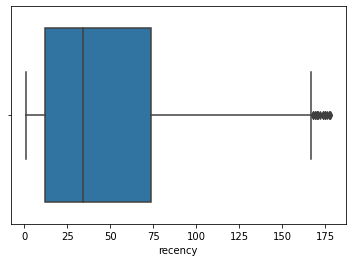

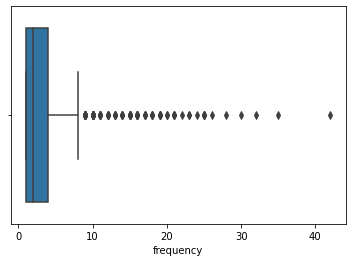

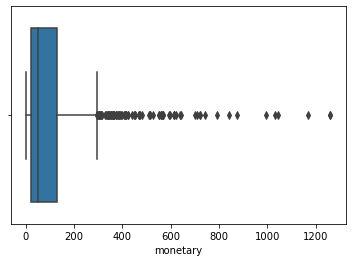

<Figure size 432x288 with 0 Axes>

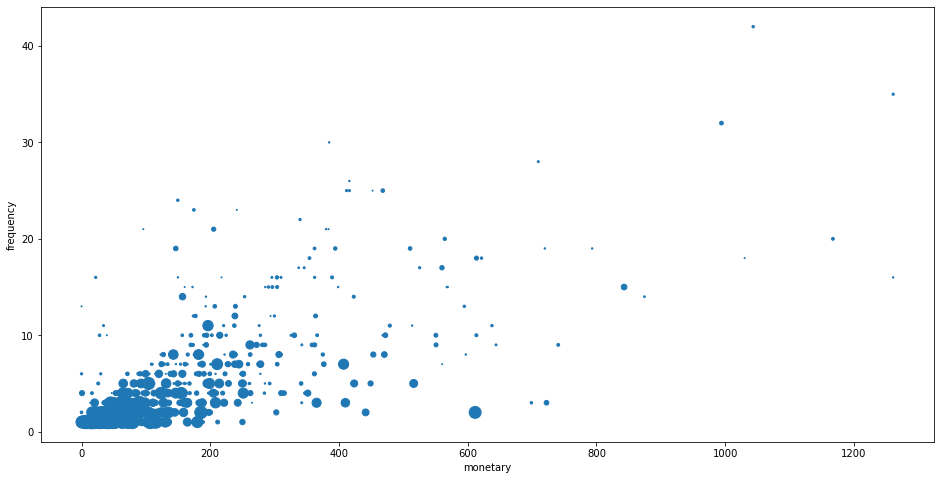

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -1860.0
   Upper bound: 1965.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2893.0000000000005
   Upper bound: 3053.6000000000004



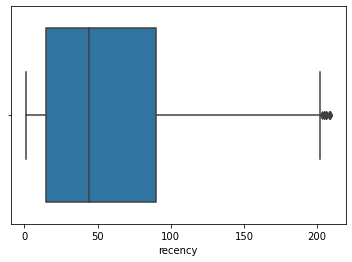

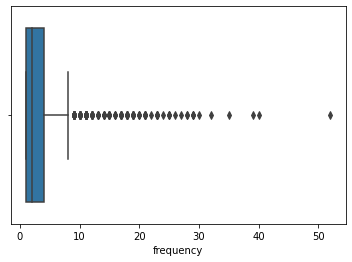

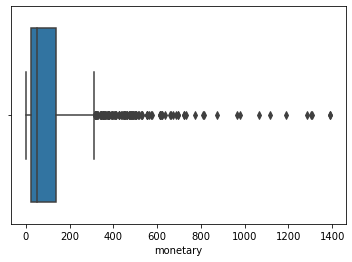

<Figure size 432x288 with 0 Axes>

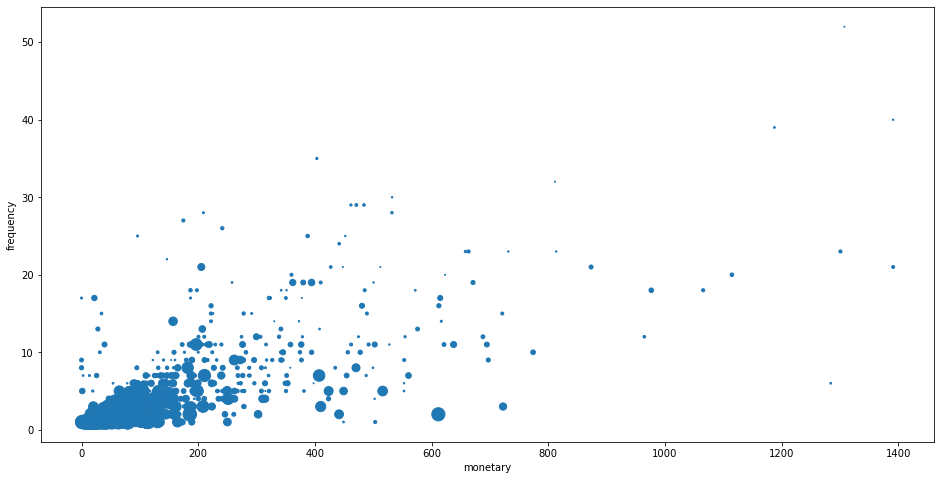

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2073.0
   Upper bound: 2211.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2809.6249999999995
   Upper bound: 2966.8899999999994



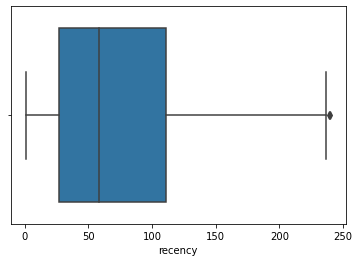

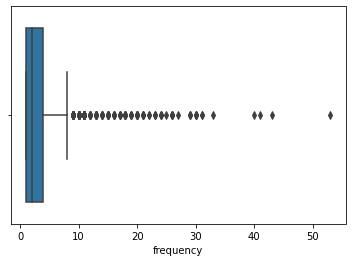

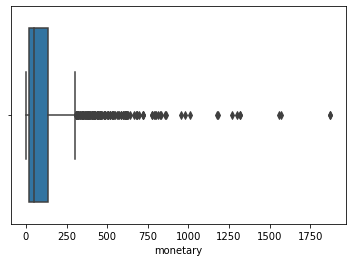

<Figure size 432x288 with 0 Axes>

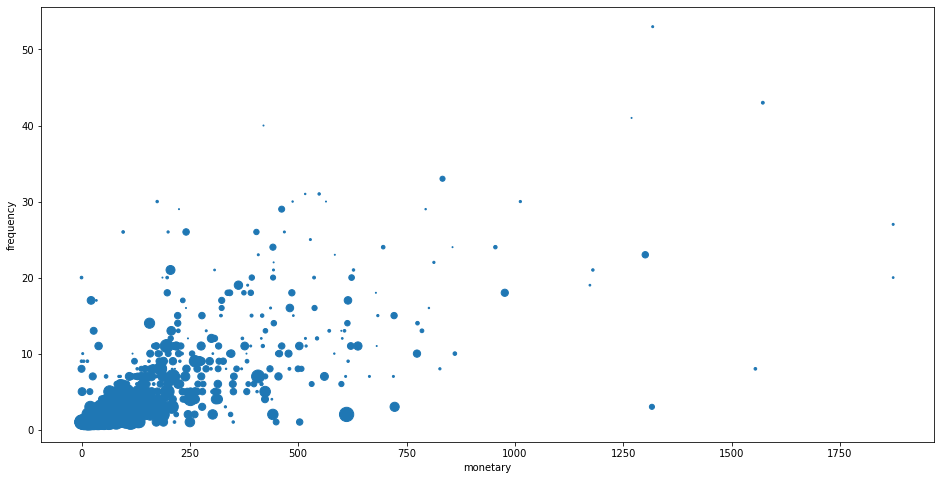

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2785.0
   Upper bound: 2927.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2851.0124999999994
   Upper bound: 3009.5249999999996



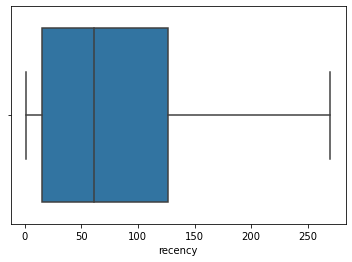

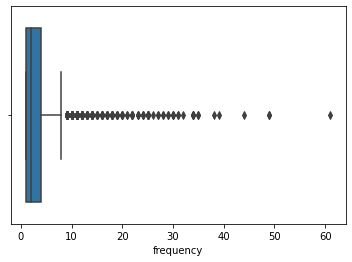

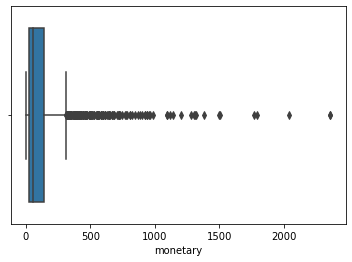

<Figure size 432x288 with 0 Axes>

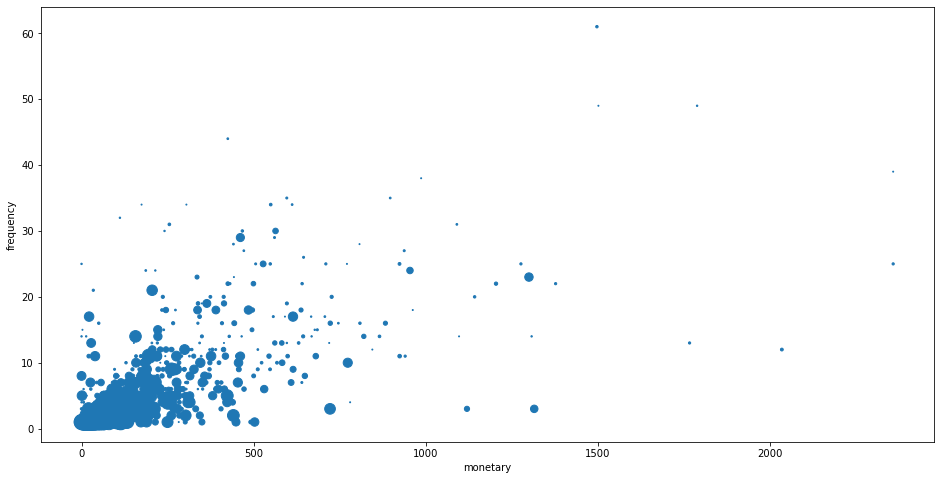

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3131.0
   Upper bound: 3295.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -2951.5750000000003
   Upper bound: 3114.1100000000006



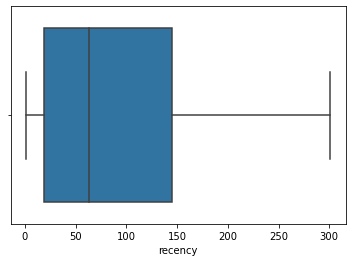

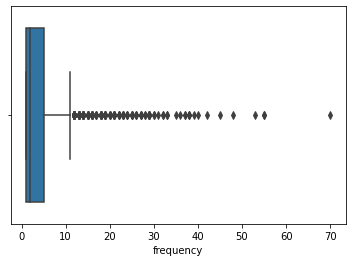

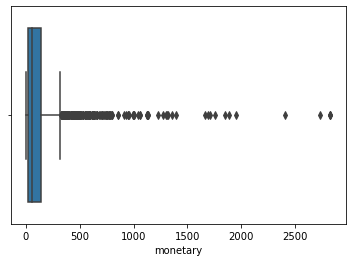

<Figure size 432x288 with 0 Axes>

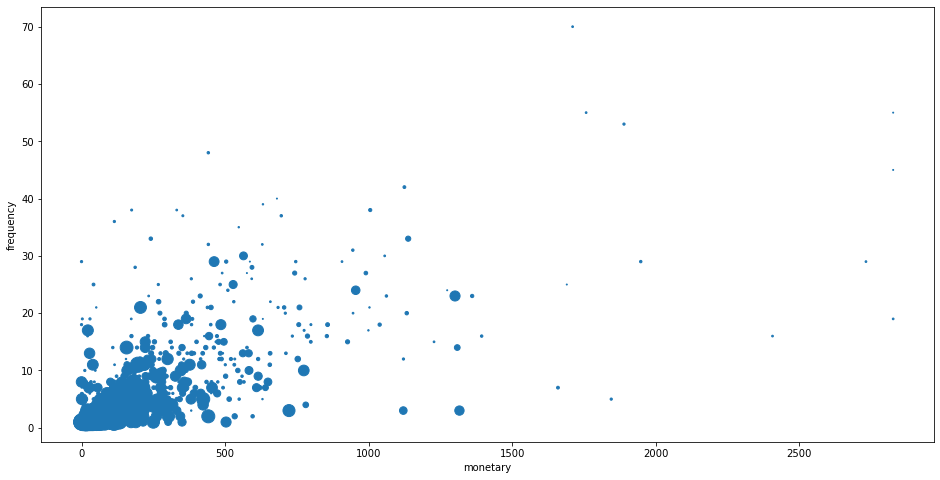

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3578.0
   Upper bound: 3766.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3194.4499999999994
   Upper bound: 3366.6999999999994



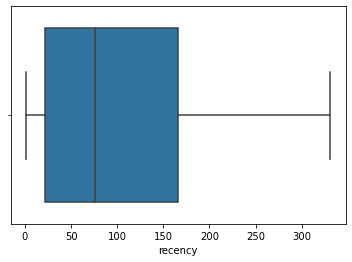

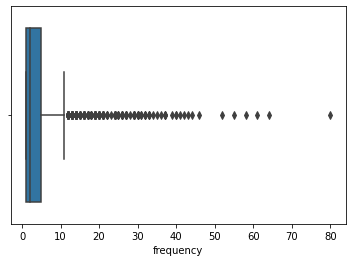

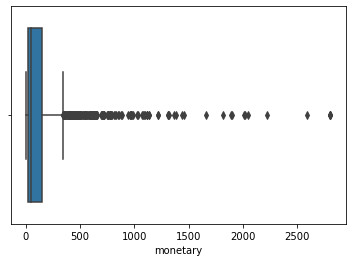

<Figure size 432x288 with 0 Axes>

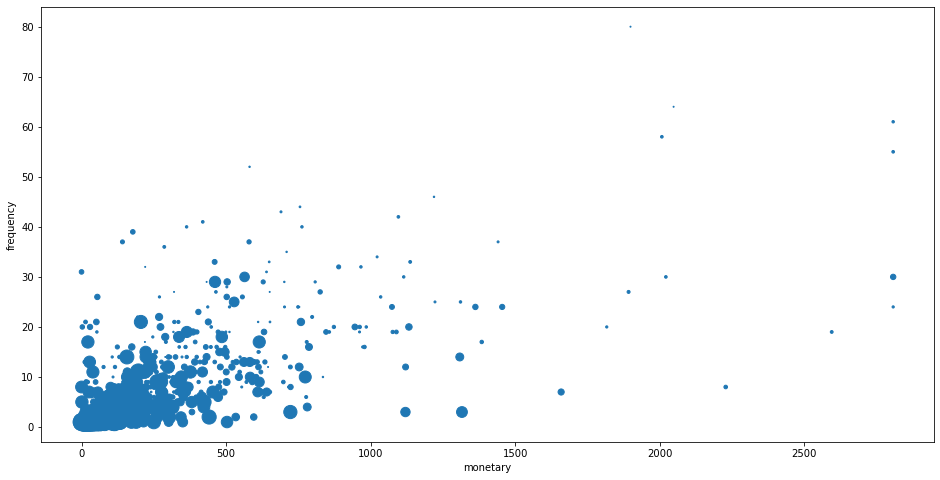

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3788.0
   Upper bound: 4015.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3228.5124999999994
   Upper bound: 3402.1249999999995



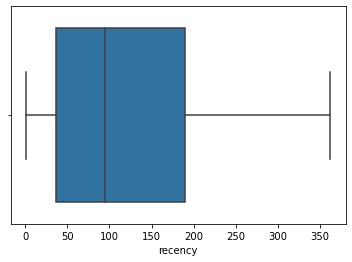

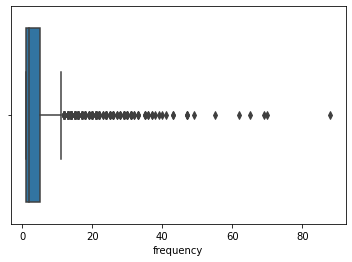

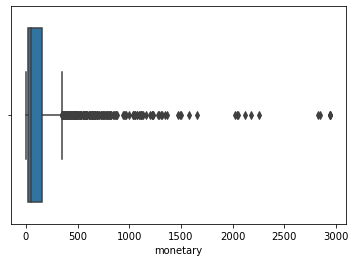

<Figure size 432x288 with 0 Axes>

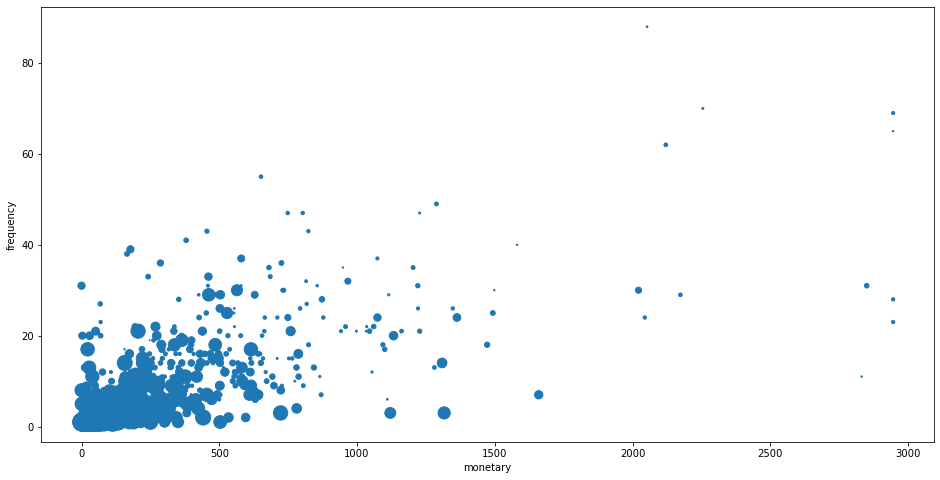

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -4497.0
   Upper bound: 4734.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3258.0124999999994
   Upper bound: 3429.9999999999995



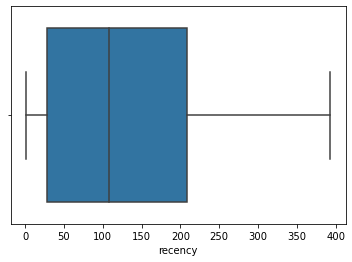

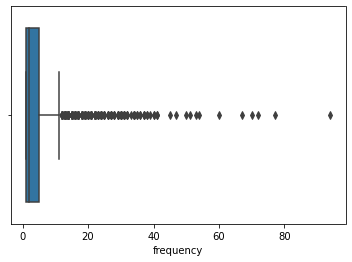

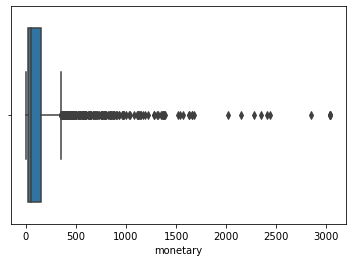

<Figure size 432x288 with 0 Axes>

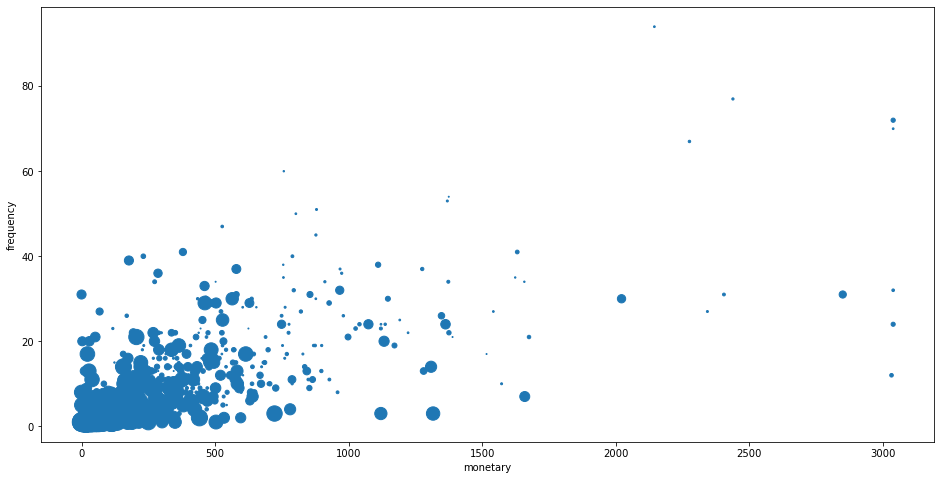

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -4792.0
   Upper bound: 5051.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3221.75
   Upper bound: 3395.5



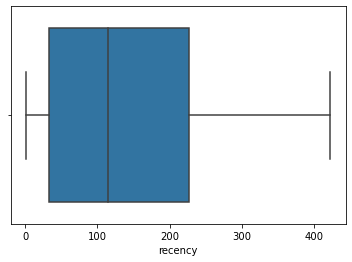

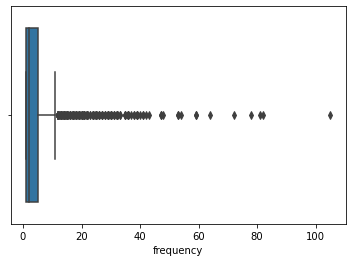

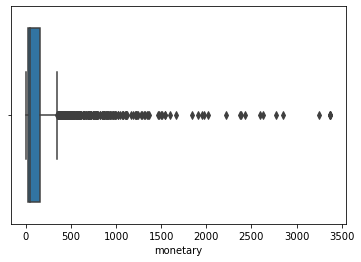

<Figure size 432x288 with 0 Axes>

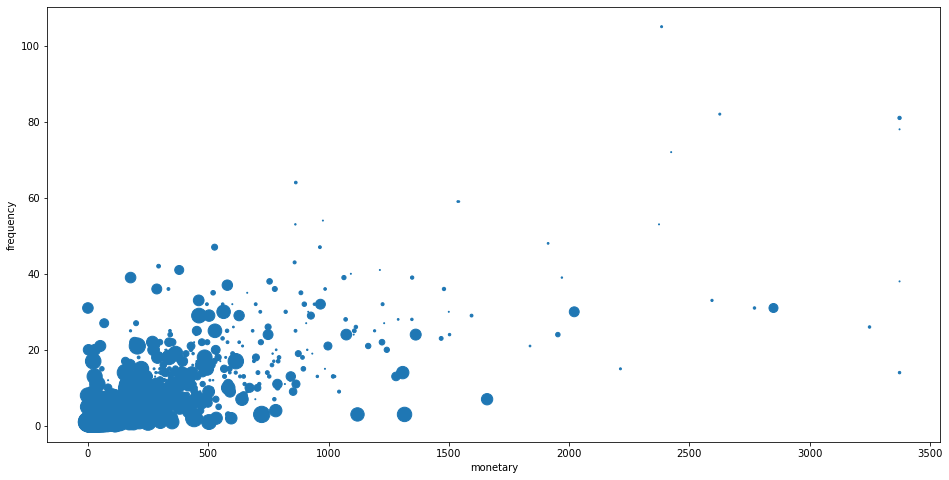

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -5188.0
   Upper bound: 5471.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3254.5625
   Upper bound: 3429.625



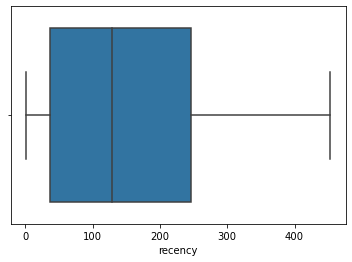

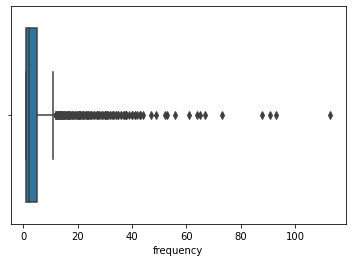

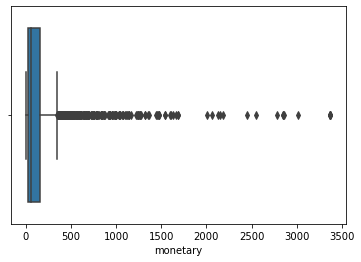

<Figure size 432x288 with 0 Axes>

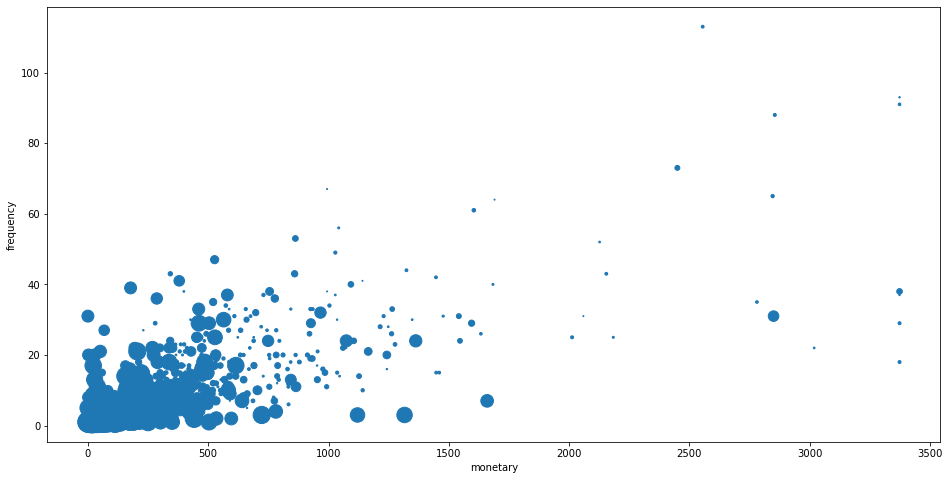

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -5608.0
   Upper bound: 5918.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3387.6875000000005
   Upper bound: 3568.0750000000003



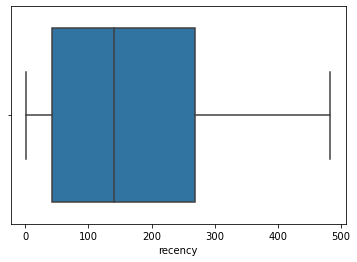

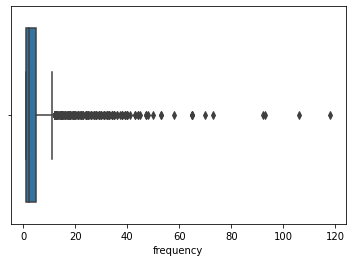

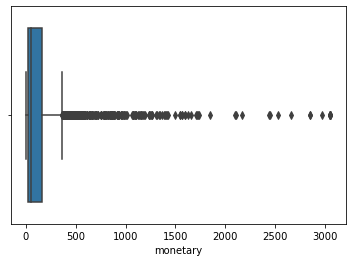

<Figure size 432x288 with 0 Axes>

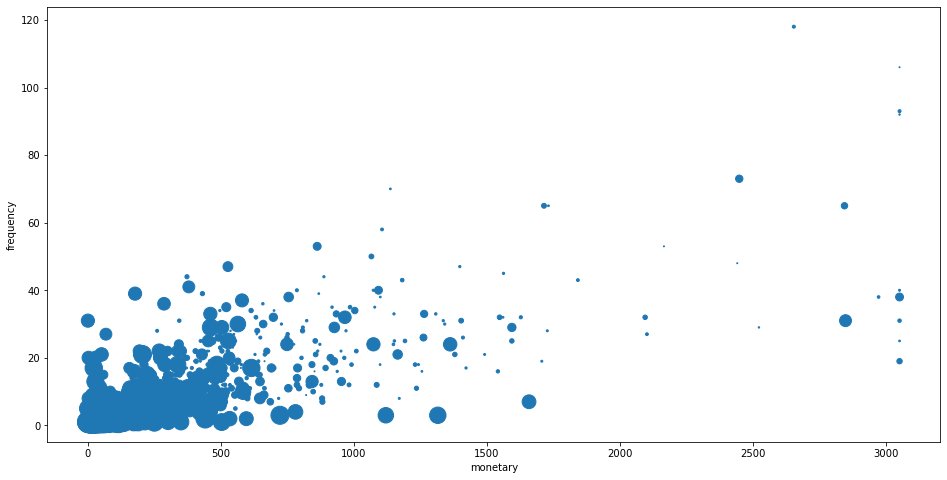

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -5986.0
   Upper bound: 6305.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3456.6250000000005
   Upper bound: 3640.7900000000004



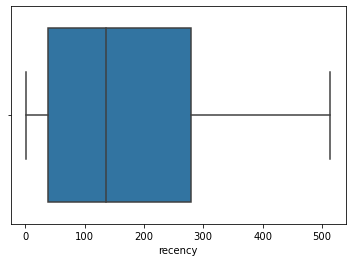

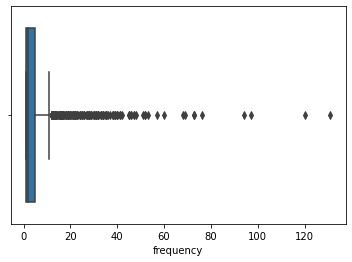

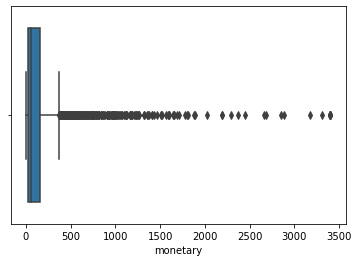

<Figure size 432x288 with 0 Axes>

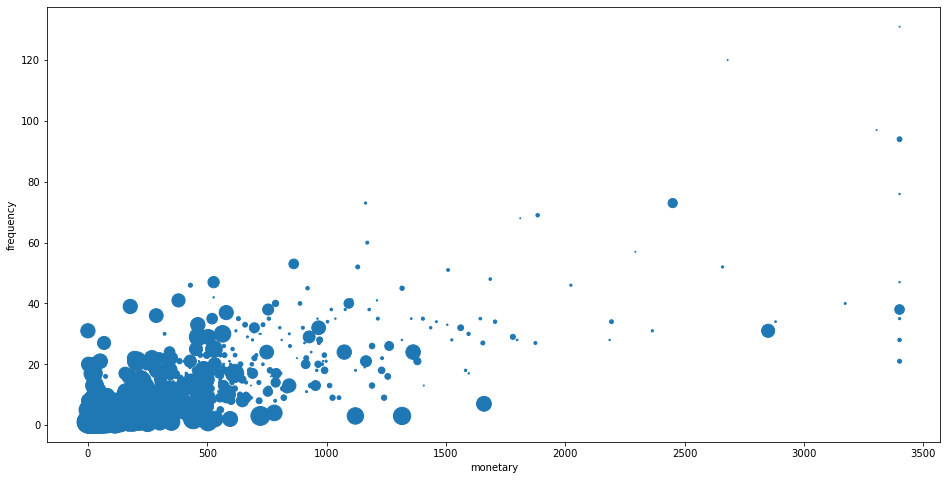

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -6487.0
   Upper bound: 6824.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3586.4075
   Upper bound: 3776.4625



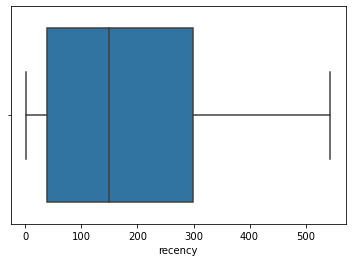

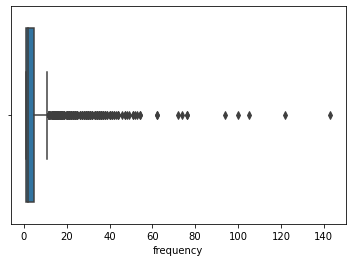

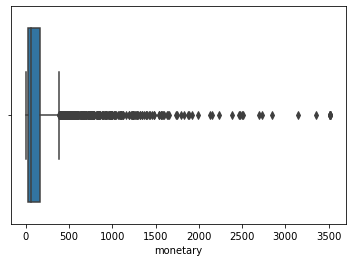

<Figure size 432x288 with 0 Axes>

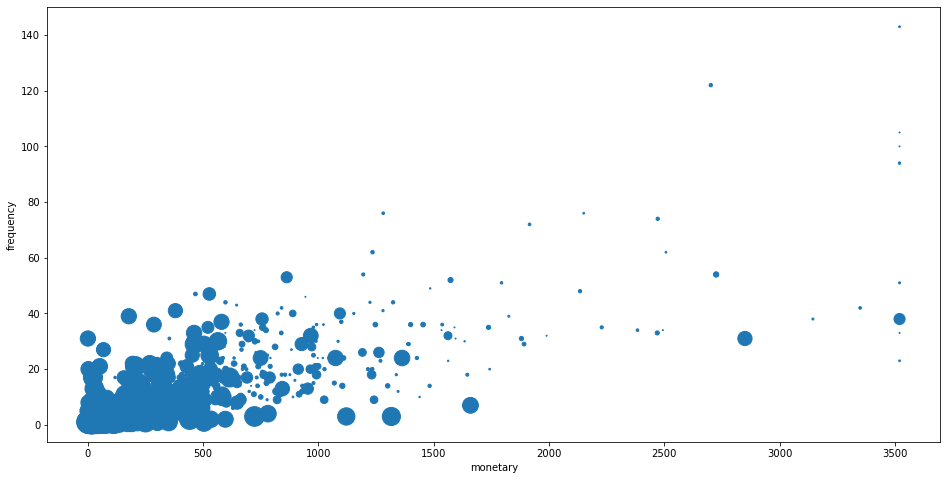

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -6836.25
   Upper bound: 7201.5

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -199.0
   Upper bound: 205.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3600.9124999999995
   Upper bound: 3791.6649999999995



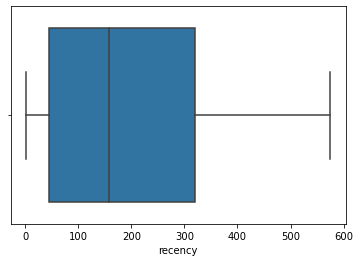

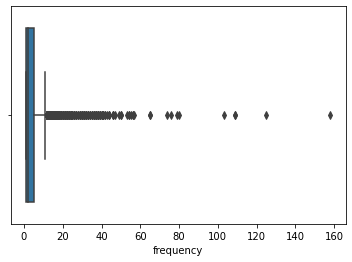

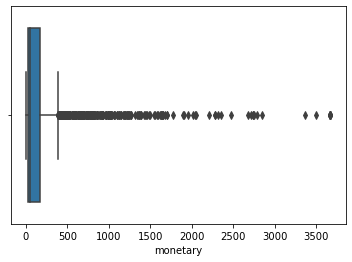

<Figure size 432x288 with 0 Axes>

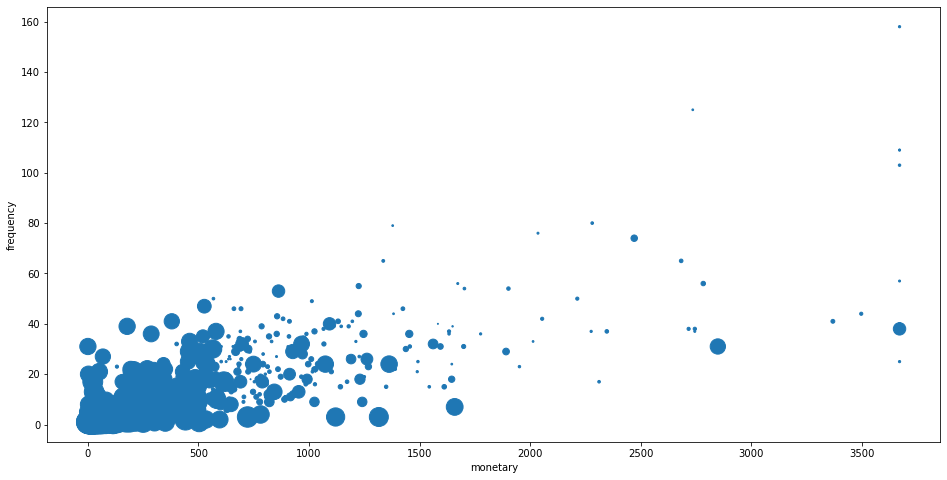

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -7046.0
   Upper bound: 7438.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3414.0450000000005
   Upper bound: 3597.3075000000003



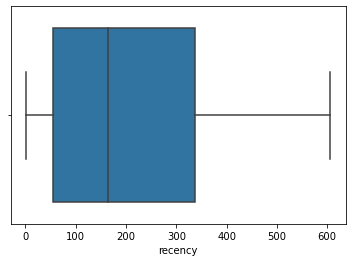

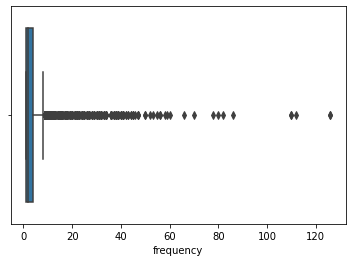

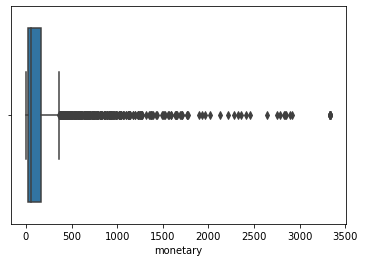

<Figure size 432x288 with 0 Axes>

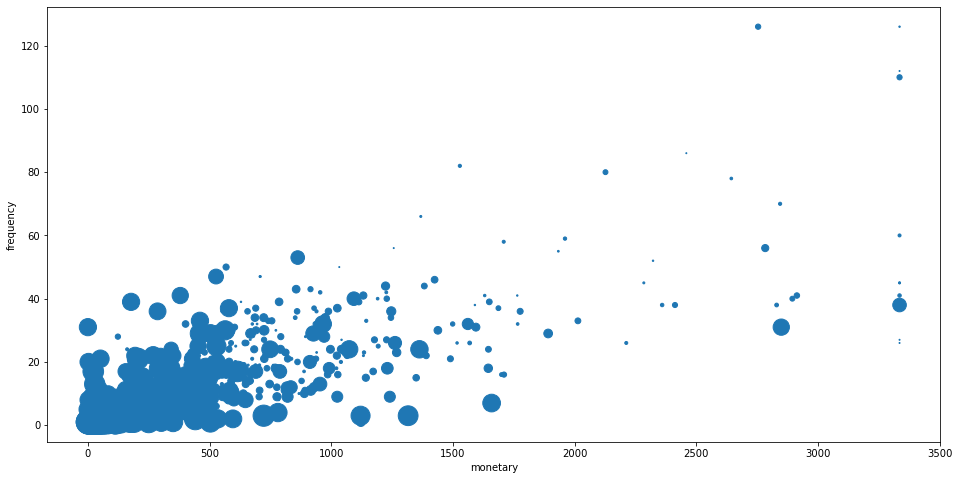

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -7679.0
   Upper bound: 8080.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3350.6
   Upper bound: 3531.34



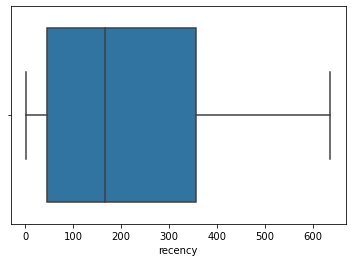

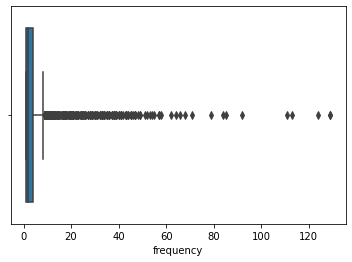

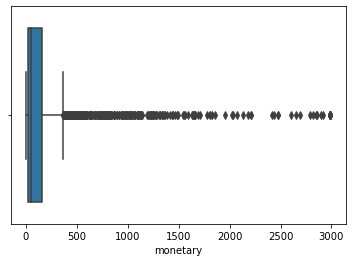

<Figure size 432x288 with 0 Axes>

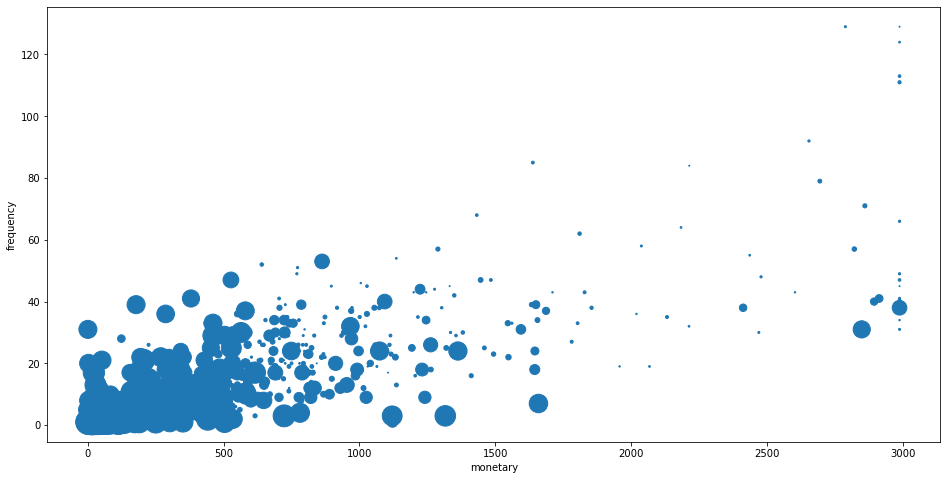

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -8104.0
   Upper bound: 8522.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3262.875
   Upper bound: 3440.31



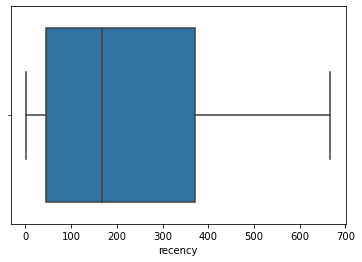

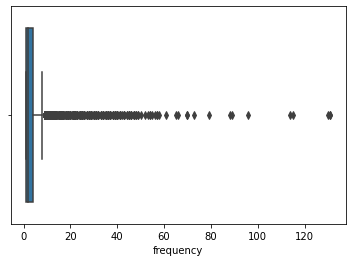

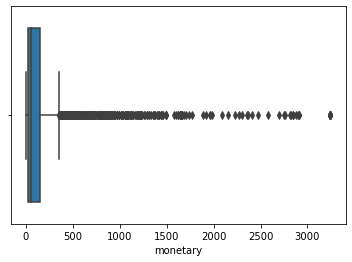

<Figure size 432x288 with 0 Axes>

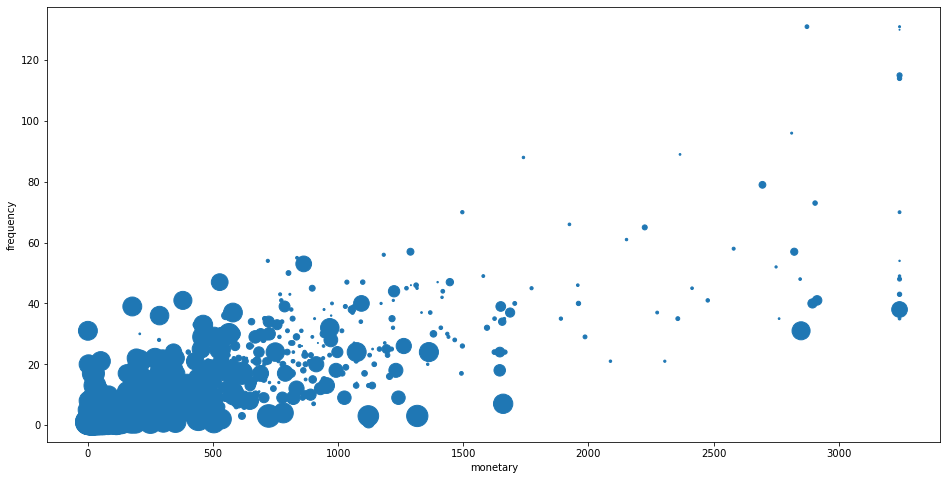

/tmp/ipykernel_68/4172602283.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
/tmp/ipykernel_68/4172602283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date


Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -8349.0
   Upper bound: 8787.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3282.7899999999995
   Upper bound: 3461.7049999999995



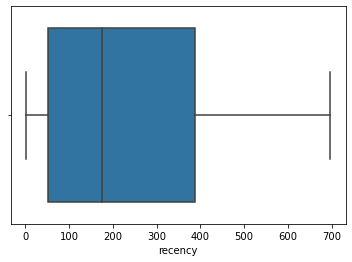

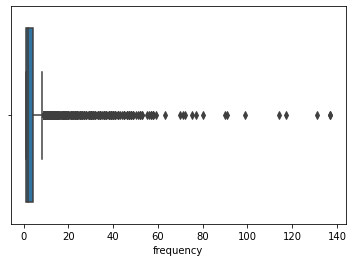

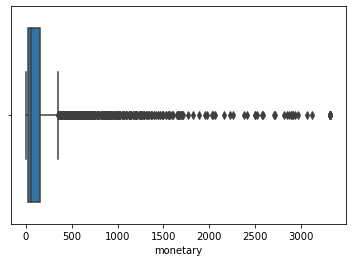

<Figure size 432x288 with 0 Axes>

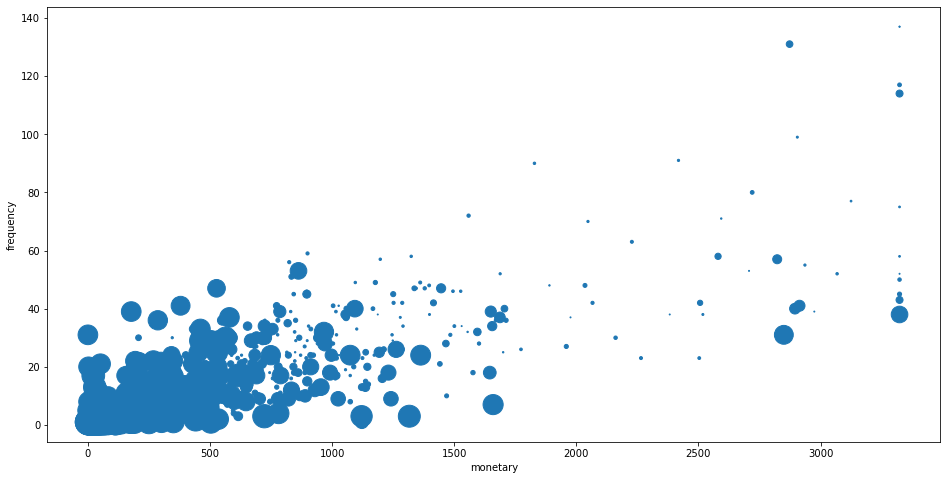

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -8563.0
   Upper bound: 9032.0

Capping outliers by the IQR method:
   IQR threshold: 50
   Lower bound: -149.0
   Upper bound: 154.0

Capping outliers by the IQR method:
   IQR threshold: 25
   Lower bound: -3246.225
   Upper bound: 3423.81



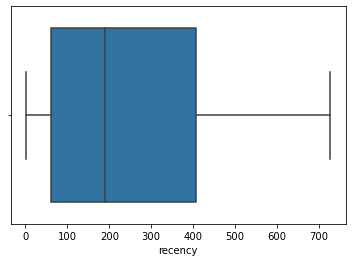

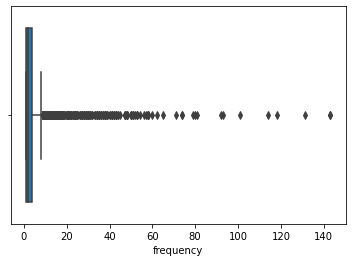

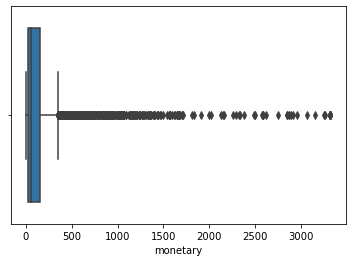

<Figure size 432x288 with 0 Axes>

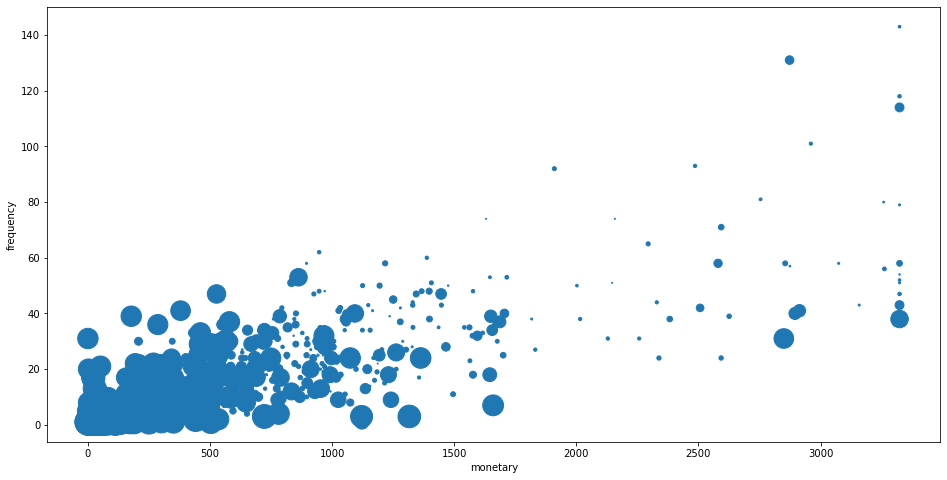

In [13]:
#CREATE A SINGLE DATASET FOR ANY PERIOD OF TIME. FOR ANY DATASET SHOULD BE HANDLE THE OUTLIERS:
for period in year_month_list_u:
    date_selector = (orders_ds.loc[:,'year_month'] >= '2015.01') & (orders_ds.loc[:,'year_month'] <= period)
    orders_ds_temporary = orders_ds.loc[date_selector]
    orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].apply(pd.to_datetime)
    orders_ds_temporary.loc[:,'created_at'] = orders_ds_temporary.loc[:,'created_at'].dt.date
    day_from_last_purchaise = max(orders_ds_temporary.loc[:,'created_at']) + timedelta(days=1)
    
    #create the variable 'recency', 'frequency', 'monetary'
    date_selector_rfm = orders_ds_temporary.groupby('user_id', ) .agg({'created_at': lambda x: (day_from_last_purchaise-max(x)).days,
                                                                 'invoice_id': 'count',
                                                                 'ricavo': 'sum'})
    
    #add the column of the period as 'year_month'
    date_selector_rfm.loc[:,'year_month'] = period
    
    #rename the columns
    date_selector_rfm.columns = ['recency', 'frequency', 'monetary', 'year_month']
    
    #MANAGE THE OUTLIERS
    date_selector_rfm['recency'] = cap_outliers(date_selector_rfm['recency'], iqr_threshold = 25, verbose=True)
    date_selector_rfm['frequency'] = cap_outliers(date_selector_rfm['frequency'],iqr_threshold = 50, verbose=True)
    date_selector_rfm['monetary'] = cap_outliers(date_selector_rfm['monetary'], iqr_threshold = 25, verbose=True)
    
    #visualize the features' dtribution: 
    sns.boxplot(x=date_selector_rfm['recency']) 
    plt.show(sns)
    plt.close()
    sns.boxplot(x=date_selector_rfm['frequency']) 
    plt.show(sns)
    plt.close()
    sns.boxplot(x=date_selector_rfm['monetary'])    
    plt.show(sns)
    plt.close()

    fig = plt.figure()
    fig, ax = plt.subplots(figsize=(16,8))
    ax.scatter(date_selector_rfm['monetary'], date_selector_rfm['frequency'], date_selector_rfm['recency'])
    ax.set_xlabel('monetary')
    ax.set_ylabel('frequency')
    plt.show()   
    plt.close(fig)
    
    #create the variable 'active_period'  
    avg_frequency_df = orders_ds_temporary .groupby('user_id').agg({'user_id': 'count', 'created_at': np.ptp})
    
    #rename the columns
    avg_frequency_df.rename(columns={'user_id': 'count', 'created_at': 'active_period'}, inplace=True)
    
    #create the variable 'avg_period'
    avg_frequency_df['avg_period']= (avg_frequency_df['active_period']/avg_frequency_df['count'])
    
    #calculating the reponse
    avg_frequency_df['response'] = np.where(
    (avg_frequency_df['avg_period'] <= datetime.timedelta(days=30)) &
    (avg_frequency_df['avg_period'] >= datetime.timedelta(days=1)) &
    (date_selector_rfm['recency'] <= 365)
    ,1,0)
    
    #transform the Timedelta format to only the days value
    avg_frequency_df['active_period']= pd.to_timedelta(avg_frequency_df.active_period, errors='coerce').dt.days
    avg_frequency_df['avg_period']=pd.to_timedelta(avg_frequency_df.avg_period, errors='coerce').dt.days
    
    #merging 'date_selector_rfm' and 'avg_frequency_df'
    date_selector_rfm['active_period']=avg_frequency_df['active_period']
    date_selector_rfm['avg_period']=avg_frequency_df['avg_period']
    date_selector_rfm['response']=avg_frequency_df['response']
    
    #SAVE THE NEWLY CREATED DATASET 
    date_selector_rfm.to_csv('/home/jovyan/A_Dataset_Graph/pipeline_1_output/date_selector_rfm_'+ period +'.csv')

In [17]:
#let's see the first 10 rows 
date_selector_rfm.loc[date_selector_rfm.index<100,:] 
date_selector_rfm

,recency,frequency,monetary,year_month,active_period,avg_period,response
user_id,,,,,,,
3,709,3,90.00,2016.12,10,3,0
15,232,3,66.20,2016.12,175,58,0
17,486,2,172.75,2016.12,27,13,0
20,109,2,40.54,2016.12,195,97,0
24,198,15,338.86,2016.12,524,34,0
...,...,...,...,...,...,...,...
7222,2,1,21.80,2016.12,0,0,0
7223,2,1,1.80,2016.12,0,0,0
7316,200,1,1121.75,2016.12,0,0,0
